# Time Series Dari Dataset Iklim Harian Di New Delhi

## 1. Import Library Awal & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("../Downloads/DailyDelhiClimate.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


Keterangan dari setiap kolom:
1. date merupakan kolom yang menyatakan tanggal terjadinya iklim di New Delhi.
2. meantemp merupakan kolom yang menjelaskan tentang rata-rata iklim dari beberapa interval 3 jam sehari.
3. humidity merupakan kolom yang menjelaskan kelembaban udara pada tanggal sesuai dari kolom date
4. wind_speed merupakan kolom yang menyatakan kecepatan angin di New Delhi yang diukur ke dalam kmph.
5. meanpressure merupakan kolom yang menyatakan tekanan rata-rata iklim di New Delhi.

Dataset ini saya dapatkan di kaggle dengan link:
https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


Namun jika dilihat dari info DataFrame, kita dapat mengetahui bahwa pada tipe data dari kolom "date" masih bersifat string/object. Disini saya akan mengubahnya menjadi tipe data sesuai timeseries yaitu datetime.

## 2. Preprocessing Untuk Kolom Date

In [4]:
data["date"] = pd.to_datetime(data["date"], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


## 3. Visualisasi

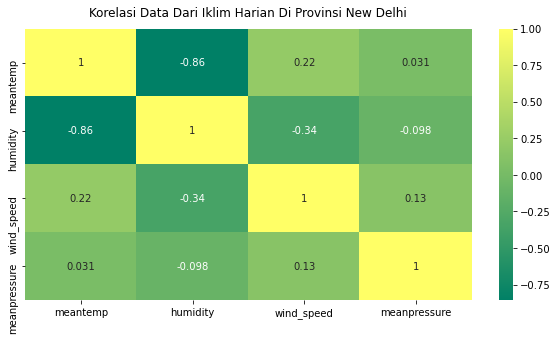

In [5]:
# Visualisasi untuk semua kolom dari DataFrame data yang bertipe data integer
plt.figure(figsize=(10, 5))

korelasi_data = sns.heatmap(data.corr(), cmap="summer", annot=True)
korelasi_data.set_title("Korelasi Data Dari Iklim Harian Di Provinsi New Delhi", fontdict={"fontsize":12}, pad=12);

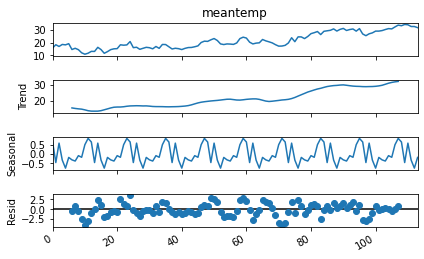

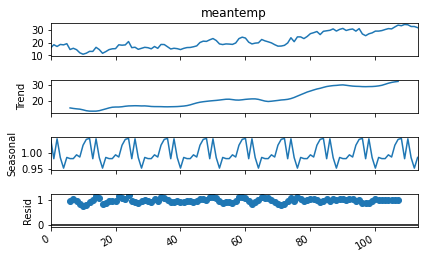

In [6]:
# Membuat visualisasi untuk melihat trend, musiman, dll dari kolom "meantemp"/rata-rata iklim di New Delhi dalam 3 jam sehari
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import dates as mpld

result_add = seasonal_decompose(data.iloc[:,1],period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()

result_mul = seasonal_decompose(data.iloc[:,1],period=12,model='multiplicative')
result_mul.plot()
plt.gcf().autofmt_xdate()

plt.show()

<AxesSubplot:xlabel='date', ylabel='humidity'>

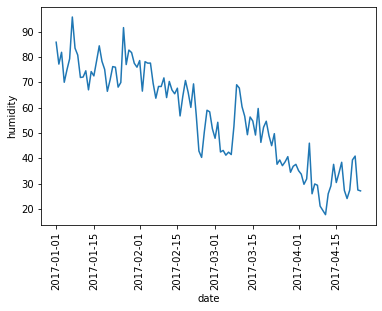

In [7]:
# Membuat visualisasi dari lineplot untuk mengetahui tingkat kelembaban iklim harian di New Delhi
plt.xticks(rotation = 90)
sns.lineplot(x="date", y="humidity", data=data)

Dapat dilihat bahwa disetiap tanggalnya, iklim di New Delhi mengalami penurunan dalam kelembaban iklim di sana. Hal tersebut mungkin dipengaruhi oleh suhu udara di New Delhi memiliki kandungan air yang semakin tinggi sehingga berakibat kepada kelembaban udara disana.

Text(0.5, 1.0, 'Nilai Autokorelasi Untuk Kecepatan Angin Di New Delhi')

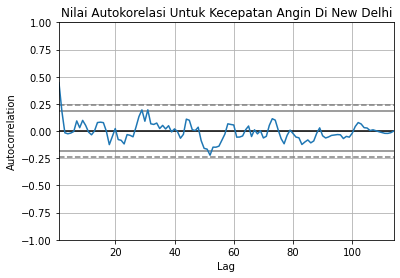

In [8]:
# Visualisasi untuk autokorelasi
from pandas.plotting import autocorrelation_plot

x = data["wind_speed"].astype(float)
autocorrelation_plot(x)
plt.title("Nilai Autokorelasi Untuk Kecepatan Angin Di New Delhi")

Fungsi dari autokorelasi adalah untuk merepresentasikan nilai matematis dari tingkat kesamaan antara time series dengan versi lagged (tertinggal) dari data itu sendiri selama interval waktu yang berurutan.

Jika dilihat autokorelasi pada kolom "wind_speed" atau kecepatan angin dapat dikatakan angin di new delhi cenderung stabil alias anginnya tidak terlalu kencang dan tidak terlalu pelan.

## 4. Melakukan Pemodelan Dengan Holtwinters

In [9]:
# Melakukan pembagian data train dan data test
data_train = data[:80] # Ambil data dari index 0 - 79
data_test = data[81:] # Ambil data dari index 81 - 113

In [10]:
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [11]:
data_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
81,2017-03-23,28.000000,49.750000,3.487500,1008.875000
82,2017-03-24,28.916667,37.666667,10.033333,1010.583333
83,2017-03-25,26.500000,39.375000,10.425000,1009.875000
84,2017-03-26,29.100000,37.100000,17.590000,1010.200000
85,2017-03-27,29.500000,38.625000,13.650000,1009.500000


In [12]:
# Memanggil model holtwinters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Memanggil fungsi ExponentialSmoothing yang telah di import
model_holtwinters = ExponentialSmoothing(data_train.meantemp, trend="add", seasonal="mul", seasonal_periods=6).fit()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Keterangan:
1. ExponentialSmoothing merupakan salah satu teknik peramalan yang melakukan penimbangan-penimbangan terhadap data masa lalu dengan cara eksponensial sehingga data paling akhir mempunyai bobot atau timbangan lebih besar dalam rata-rata bergerak.
2. train merupakan data train.
3. Pada nilai seasonal saya memakai nilai dari multiplicative karena dalam setiap pengamatannya selalu dilakukan dengan perkalian dari sebuah komponen yang telah ada. Rumus multiplicative adalah: y = base * trend * seasonality * residual.
4. Durasi/periode nilai seasonal/musiman yang saya gunakan adalah 4.

In [13]:
prediction = model_holtwinters.forecast(5)
prediction

80    25.492027
81    24.714925
82    25.360936
83    26.358237
84    25.868544
dtype: float64

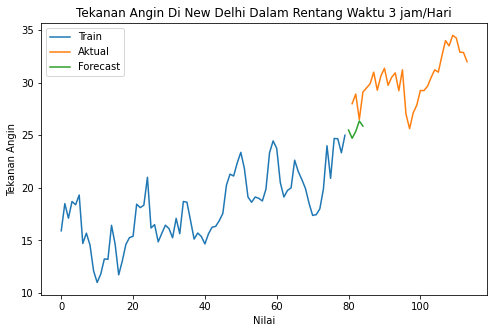

In [14]:
# Menganalisa apakah tekanan angin di New Delhi cenderung mengalami kenaikan atau tidak
plt.figure(figsize = (8, 5))
data_train["meantemp"].plot(legend=True, label="Train")
data_test["meantemp"].plot(legend=True, label="Aktual")

prediction.plot(legend=True, label="Forecast")

plt.title("Tekanan Angin Di New Delhi Dalam Rentang Waktu 3 jam/Hari")
plt.xlabel("Nilai")
plt.ylabel("Tekanan Angin")
plt.show()

Kesimpulan dari visualisasi diatas adalah bahwa tekanan angin di kota New Delhi cenderung mengalami kenaikan setelah menggunakan model holtwinters.